<a href="https://colab.research.google.com/github/Keerthana826/EDA-Capstone/blob/main/EDA_Capstone_Keerthana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**


**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotelbookings=pd.read_csv("/content/drive/MyDrive/EDA Project/Hotel Bookings.csv")
hotelbookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotelbookings.shape

(119390, 32)

In [ ]:
hotelbookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotelbookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##**Data** **Cleaning**

### a) Checking for data type

In [ ]:
hotelbookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
hotelbookings.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

### b) Handling missing values

In [ ]:
hotelbookings.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
hotelbookings[['company','agent']] = hotelbookings[['company','agent']].fillna(0)
hotelbookings['children'].unique()
hotelbookings['children'].fillna(hotelbookings['children'].mean(), inplace = True)
hotelbookings['country'].fillna('others', inplace = True)
hotelbookings.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
hotelbookings[hotelbookings['adults']+hotelbookings['babies']+hotelbookings['children'] == 0].shape

(180, 32)

In [ ]:
hotelbookings.drop(hotelbookings[hotelbookings['adults']+hotelbookings['babies']+hotelbookings['children'] == 0].index, inplace = True)

### c) Converting columns to appropriate datatypes

In [ ]:
hotelbookings[['children', 'company', 'agent']] = hotelbookings[['children', 'company', 'agent']].astype('int64')

In [ ]:
hotelbookings['reservation_status_date'] = pd.to_datetime(hotelbookings['reservation_status_date'], format = '%Y-%m-%d')

### d) Check for duplicate value rows

In [ ]:
hotelbookings.duplicated().value_counts()

False    87230
True     31980
dtype: int64

In [ ]:
hotelbookings.drop_duplicates(inplace=True) 

In [ ]:
hotelbookings.shape

(87230, 32)

### e) Addings important columns

In [ ]:
hotelbookings['total_stay'] = hotelbookings['stays_in_weekend_nights']+hotelbookings['stays_in_week_nights']
hotelbookings['total_people'] = hotelbookings['adults']+hotelbookings['children']+hotelbookings['babies']


#1) Most used distribution channel

In [ ]:
hotelbookings.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hotelbookings.distribution_channel.value_counts()

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


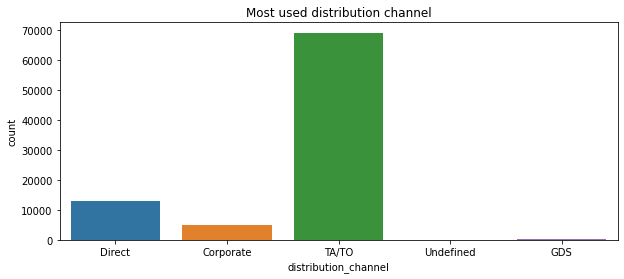

In [ ]:
plt.rcParams['figure.figsize'] = (10,4)
plt.title('Most used distribution channel')
sns.countplot(hotelbookings.distribution_channel)

Most used distribution channel is TA/TO.

#2) Market segments used by the guests

In [ ]:
Marketsegments = hotelbookings.market_segment.unique()
print(Marketsegments)

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:
market = hotelbookings['market_segment'].value_counts().reset_index()
market.columns=['Marketsegments','Number of guests']
market['Marketsegments'] = pd.Categorical(market['Marketsegments'], categories=Marketsegments, ordered=True)
market.sort_values('Marketsegments').reset_index()

,index,Marketsegments,Number of guests
0,2,Direct,11780
1,4,Corporate,4200
2,0,Online TA,51553
3,1,Offline TA/TO,13855
4,5,Complementary,692
5,3,Groups,4922
6,7,Undefined,2
7,6,Aviation,226


In [ ]:
d_resort = hotelbookings[(hotelbookings['hotel'] == 'Resort Hotel') & (hotelbookings['is_canceled'] == 0)]
d_city = hotelbookings[(hotelbookings['hotel'] == 'City Hotel') & (hotelbookings['is_canceled'] == 0)]

resorthotel = d_resort.groupby(['market_segment'])['adr'].mean().reset_index()
cityhotel= d_city.groupby(['market_segment'])['adr'].mean().reset_index()

finalhotel = resorthotel.merge(cityhotel, on = 'market_segment')
finalhotel.columns = ['Marketsegment', 'resort_price', 'city_price']
finalhotel

,Marketsegment,resort_price,city_price
0,Complementary,4.390127,2.875501
1,Corporate,49.569977,82.079575
2,Direct,110.152088,120.829624
3,Groups,64.170640,86.065029
4,Offline TA/TO,74.264852,85.982270
5,Online TA,107.461988,118.463338


In [ ]:
resortguest = d_resort['market_segment'].value_counts().reset_index()
resortguest.columns=['Marketsegment','no of guests']
resortguest

cityguest = d_city['market_segment'].value_counts().reset_index()
cityguest.columns=['Marketsegment','no of guests']
cityguest

finalguest=resortguest.merge(cityguest, on = 'Marketsegment')
finalguest.columns=['Marketsegment','no of guests in resort','no of guest in city hotel']
finalguest

,Marketsegment,no of guests in resort,no of guest in city hotel
0,Online TA,10997,22314
1,Offline TA/TO,5816,5982
2,Direct,5417,4626
3,Groups,1858,1732
4,Corporate,1736,1955
5,Complementary,158,449


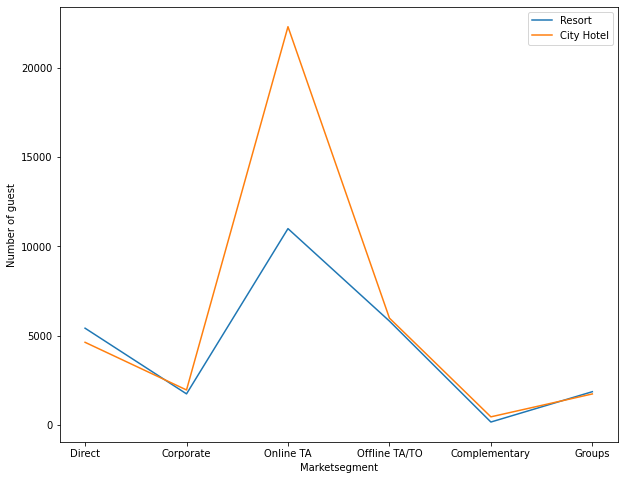

In [ ]:
Marketsegments = hotelbookings.market_segment.unique()
finalguest['Marketsegment'] = pd.Categorical(finalguest['Marketsegment'], categories=Marketsegments, ordered=True)
finalguest = finalguest.sort_values('Marketsegment').reset_index()


sns.lineplot(data=finalguest, x='Marketsegment', y='no of guests in resort')
sns.lineplot(data=finalguest, x='Marketsegment', y='no of guest in city hotel')

plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(10,8)

Most used Market segment for both the hotels is Online TA.

#3) Meals preferred

In [ ]:
hotelbookings.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotelbookings.meal.value_counts()

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


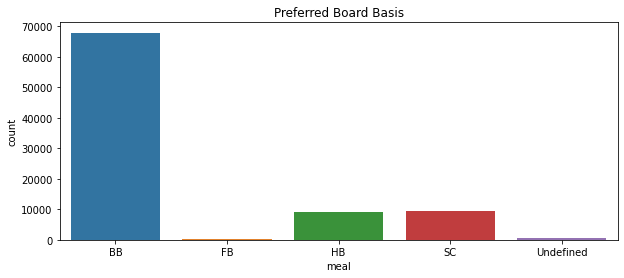

In [ ]:
plt.rcParams['figure.figsize'] = (10,4)
plt.title('Preferred Board Basis')
sns.countplot(hotelbookings.meal)

#4) Heat Correlation Map

In [ ]:
new_hotelbooking = hotelbookings[hotelbookings['is_canceled'] == 0]                      # segregation of actual guest who doesn't canceled their bookings from is_canceled column
new_hotelbooking.shape

(63221, 34)

Text(0.5, 1.0, 'Heat correlation map of hotel booking data')

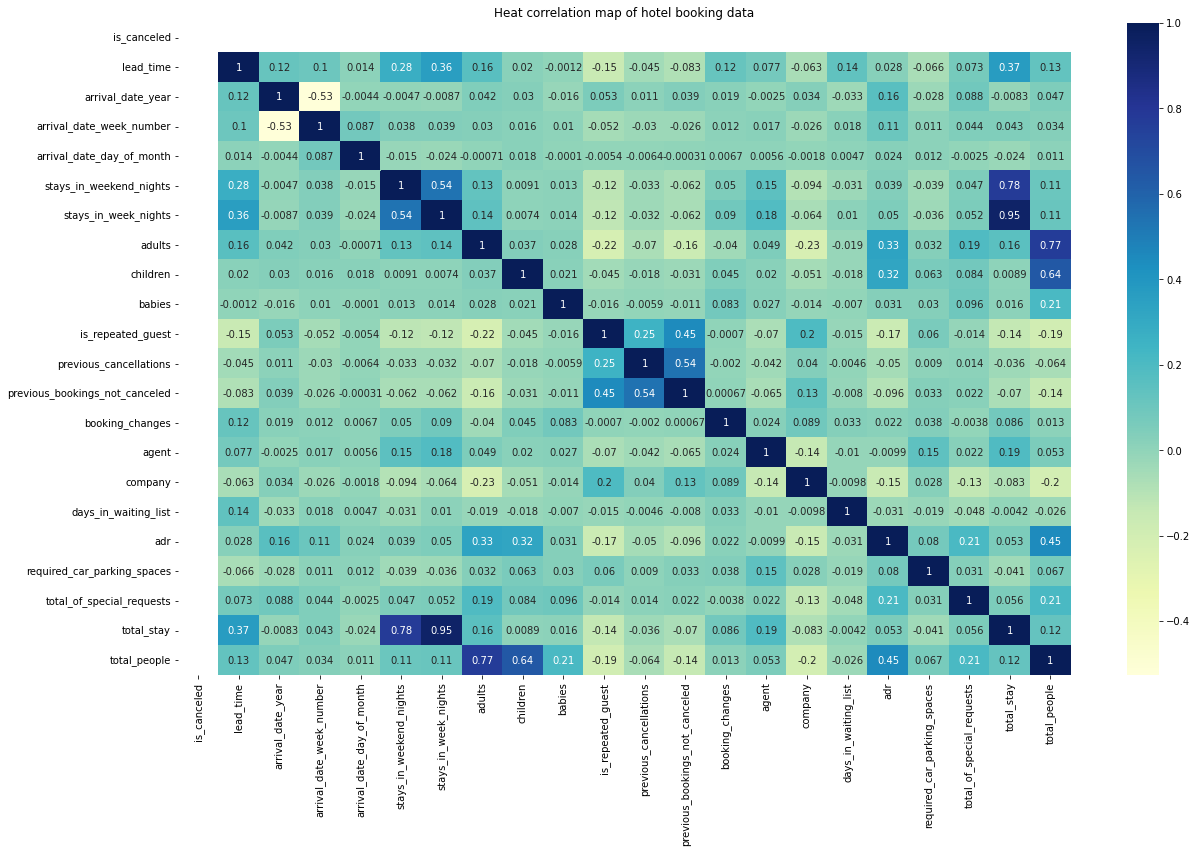

In [ ]:
df_correlation = new_hotelbooking.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df_correlation, cmap="YlGnBu", annot=True)
plt.title('Heat correlation map of hotel booking data')

**Conclusion** The average daily rate is slightly correlated with total number of guest.Hence we can understand that when number of guest increases ,the average daily rate of hotel also increases with it. They are positively correlated to each other. The average daily rate is negatively correlated with the number of special request.Hence we can understand that when the umber of special request increases the revenue of the hotel decreases. The total number of days stay and lead time have slight positive correlation to each other. Thus we can say that higher number of days stay result in higher lead time.we can conclude by saying that the guest who plans to stay in hotel for longer duration always do the booking and planning of the trip very early.